### Lab 4 Anomaly Detection 2

In this lab, you will continue working with detecting anomalies in high dimensional data. You will use basic Python libraries and the PyOD (https://pyod.readthedocs.io/en/latest/) libaray for detecting anomalies. Save your notebook with your name.

In [489]:
#Author: Daniel Persson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",100)

## Data overview

This dataset contains information on energy usage for different homes over a period of time. The data was collected by a wireless sensor installed in each of the homes. There are 30 features and 19735 data points.


In [490]:
energy_data= pd.read_csv('energy_usage.csv')
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Usage_level
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,0
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,0
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,0
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,0


In [491]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Data Preparation

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1

### 1a: Remove the 'date' feature from the dataset 
### 1b: Implement feature-wise normalization with min-max normalization on all the features except 'usage_level'
### 1c: Set your label as 'Usage_level and divide your dataset into training and testing sets    




</div>

In [492]:
#Please implement task 1a here
energy_data = energy_data.drop('date', axis=1)
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [493]:
#Please implement task 1b here
from sklearn.preprocessing import MinMaxScaler

usage_level = energy_data['Usage_level']
labels = usage_level

energy_data = energy_data.drop('Usage_level', axis=1)
normalized_data = (energy_data - energy_data.min(axis=0)) / (energy_data.max(axis=0) - energy_data.min(axis=0))
    
energy_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [494]:
#Please implement task 1c here
split = int(0.7 * len(normalized_data))

train_data = normalized_data[:split]
test_data= normalized_data[split:]
train_labels= labels[:split]

test_labels=labels[split:]

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Principal Component Analysis

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2

### 2a: Determine the optimal number of principal components to keep for your data. A skeleton of the code is provided for you. 
    
### 2b: Implement PCA as an anomaly detection technique with the optimal number of principal components from task 2a. 
    
### 2c: Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)

Note: use the normalized data from Task 1

</div>

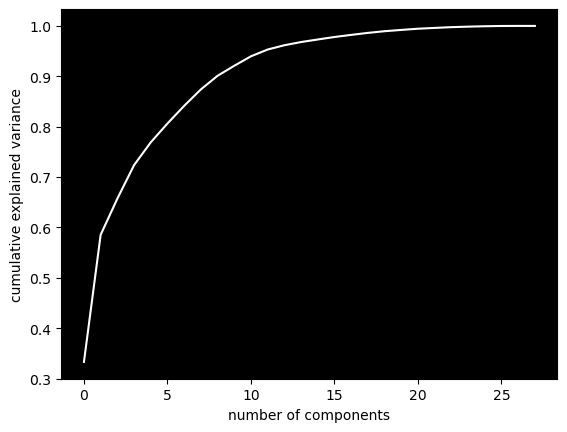

In [511]:
#Please implement task 2a here
pca = PCA()
X_pca = pca.fit(normalized_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='white')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.gca().set_facecolor('black')

#I would say about 10 is the optimal.

In [496]:
# Implement Task 2b here
pca = PCA(n_components=10)
pca.fit(train_data)
anomaly_scores0 = pca.predict_proba(test_data)

Test Precision: 0.9980034227039362
Test Recall: 0.5916469394656747
Test AUC: 0.9995840928542885


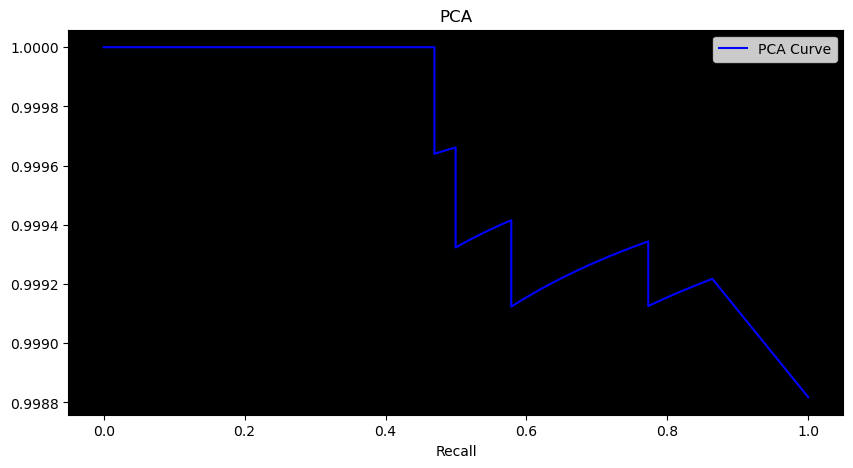

In [497]:
# Implement Task 2c here
import sklearn.metrics as met

test_precision = met.precision_score(test_labels, np.round(anomaly_scores0[:,0]), pos_label = 0)
test_recall = met.recall_score(test_labels, np.round(anomaly_scores0[:,0]), pos_label = 0)
test_curve_PCA = met.precision_recall_curve(test_labels, anomaly_scores0[:,0], pos_label = 0)

plt.figure(figsize=(10, 5))
plt.plot(test_curve_PCA[1], test_curve_PCA[0], color='blue', label='PCA Curve')
plt.title('PCA')
plt.xlabel('Recall')
plt.legend()
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test AUC:', met.auc(test_curve_PCA[1], test_curve_PCA[0]))
plt.gca().set_facecolor('black')
plt.show()

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Autoencoder

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3

### 3a: Implement an autoencoder from the PyOD library on the dataset. 
### 3b: Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)


</div>

In [498]:
# Implement Task 3a here
from pyod.models.auto_encoder_torch import AutoEncoder
# Implement Task 3a here
pca = AutoEncoder()
pca.fit(train_data)
anomaly_scores1 = pca.predict_proba(test_data)

InnerAutoencoder(
  (activation): ReLU()
  (encoder): Sequential(
    (linear0): Linear(in_features=28, out_features=64, bias=True)
    (batch_norm0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU()
    (dropout0): Dropout(p=0.2, inplace=False)
    (linear1): Linear(in_features=64, out_features=32, bias=True)
    (batch_norm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
  )
  (decoder): Sequential(
    (linear0): Linear(in_features=32, out_features=64, bias=True)
    (batch_norm0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU()
    (dropout0): Dropout(p=0.2, inplace=False)
    (linear1): Linear(in_features=64, out_features=28, bias=True)
    (relu1): ReLU()
  )
)
epoch 0: training loss 0.7323859501630068 
epoch 1: training loss 0.6332118081411829 
epoch 2: training loss 0.618406424

Test Precision: 0.9983857949959645
Test Recall: 0.41832938789313495
Test AUC: 0.9988187121078104


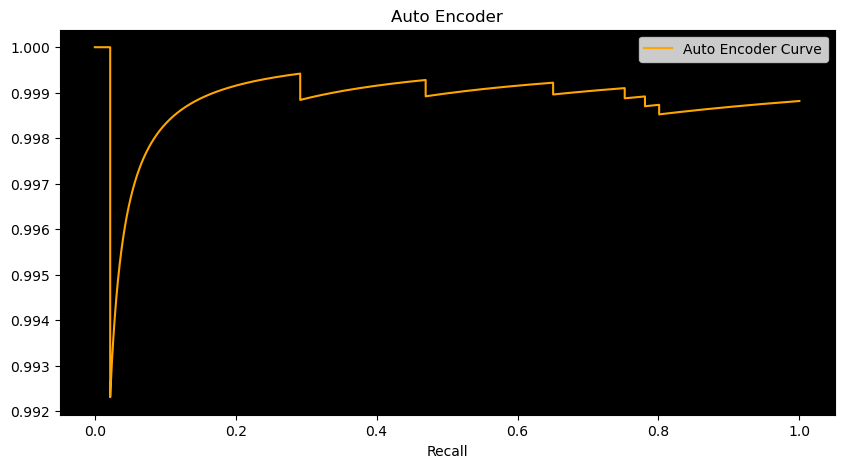

In [499]:
# Implement Task 3b here
import sklearn.metrics as met

test_precision = met.precision_score(test_labels, np.round(anomaly_scores1[:,0]), pos_label = 0)
test_recall = met.recall_score(test_labels, np.round(anomaly_scores1[:,0]), pos_label = 0)
test_curve_AutoEncoder = met.precision_recall_curve(test_labels, anomaly_scores1[:,0], pos_label = 0)

plt.figure(figsize=(10, 5))
plt.plot(test_curve_AutoEncoder[1], test_curve_AutoEncoder[0], color='orange', label='Auto Encoder Curve')
plt.title('Auto Encoder')
plt.xlabel('Recall')
plt.legend()
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test AUC:', met.auc(test_curve_AutoEncoder[1], test_curve_AutoEncoder[0]))
plt.gca().set_facecolor('black')
plt.show()

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Angle-based Outlier Detection

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4

### 4a:Implement ABOD from PyOD on the dataset. Remember to set the hyperparameters.
### 4b: Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)



</div>

In [500]:
# Implement Task 4a here
from pyod.models.abod import ABOD as PyODABOD

# Create an ABOD model with specified hyperparameters
abod_model = PyODABOD(contamination=0.1)  # You can adjust the contamination parameter as needed
abod_model.fit(train_data)

# Predict anomaly scores for the test data
anomaly_scores2 = abod_model.predict_proba(test_data)

Test Precision: 0.9988177672690424
Test Recall: 1.0
Test AUC: 0.9992863918807053


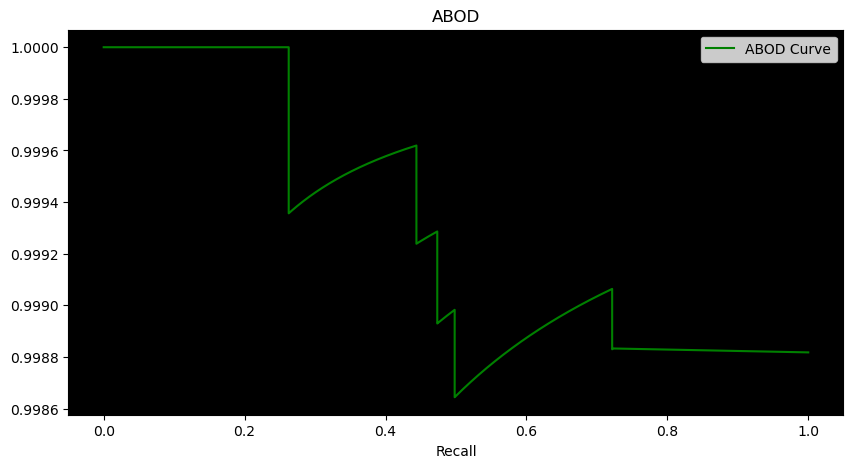

In [501]:
import sklearn.metrics as met

test_precision = met.precision_score(test_labels, np.round(anomaly_scores2[:,0]), pos_label = 0)
test_recall = met.recall_score(test_labels, np.round(anomaly_scores2[:,0]), pos_label = 0)
test_curve_ABOD = met.precision_recall_curve(test_labels, anomaly_scores2[:,0], pos_label = 0)

plt.figure(figsize=(10, 5))
plt.plot(test_curve_ABOD[1], test_curve_ABOD[0], color='green', label='ABOD Curve')
plt.title('ABOD')
plt.xlabel('Recall')
plt.legend()
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test AUC:', met.auc(test_curve_ABOD[1], test_curve_ABOD[0]))
plt.gca().set_facecolor('black')
plt.show()

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Isolation Forests

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 5

### 5a:Implement an Isolation Forest from PyOD on the dataset. Remember to set the hyperparameters.
    
### 5b:Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)



</div>

In [502]:
# Implement Task 5a here
# Implement Task 4a here
from pyod.models.iforest import IForest as forest

# Create an ABOD model with specified hyperparameters
forest_model = forest(contamination = 0.1, n_estimators = 500, max_samples = 512)  # You can adjust the contamination parameter as needed
forest_model.fit(train_data)

# Predict anomaly scores for the test data
anomaly_scores3 = forest_model.predict_proba(test_data)

C:\Users\Danne\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Test Precision: 0.9984439834024896
Test Recall: 0.650997632735881
Test AUC: 0.9993259715157607


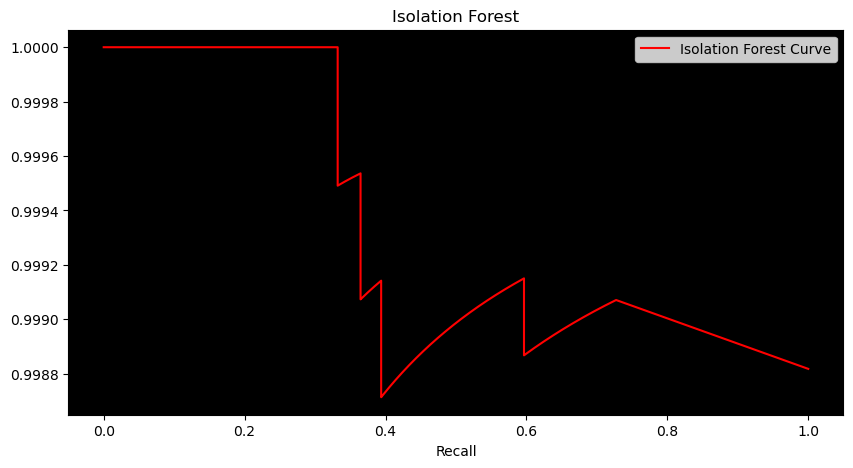

In [503]:
# Implement Task 5b here
import sklearn.metrics as met

test_precision = met.precision_score(test_labels, np.round(anomaly_scores3[:,0]), pos_label = 0)
test_recall = met.recall_score(test_labels, np.round(anomaly_scores3[:,0]), pos_label = 0)
test_curve_IsoForest = met.precision_recall_curve(test_labels, anomaly_scores3[:,0], pos_label = 0)

plt.figure(figsize=(10, 5))
plt.plot(test_curve_IsoForest[1], test_curve_IsoForest[0], color='red', label='Isolation Forest Curve')
plt.title('Isolation Forest')
plt.xlabel('Recall')
plt.legend()
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test AUC:', met.auc(test_curve_IsoForest[1], test_curve_IsoForest[0]))
plt.gca().set_facecolor('black')
plt.show()

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### Feature Bagging
    

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 6

### 6a:Implement Feature Bagging from PyOD on the dataset. Remember to set the hyperparameters.
    
### 6b:Calculate, precision, recall and plot the precision-recall curve, calulate AUC. Give a comment on what you see in the curve wrt. Area Under the Curve (AUC)



</div>

In [504]:
# Implement Task 6a here
!pip install combo
from pyod.models.feature_bagging import FeatureBagging as FB

feature_bagging_model = FB(contamination = 0.1, n_estimators = 50)
feature_bagging_model.fit(train_data)

anomaly_scores4 = feature_bagging_model.predict_proba(test_data)

Test Precision: 0.9988704819277109
Test Recall: 0.8971931011159959
Test AUC: 0.9988154894112566


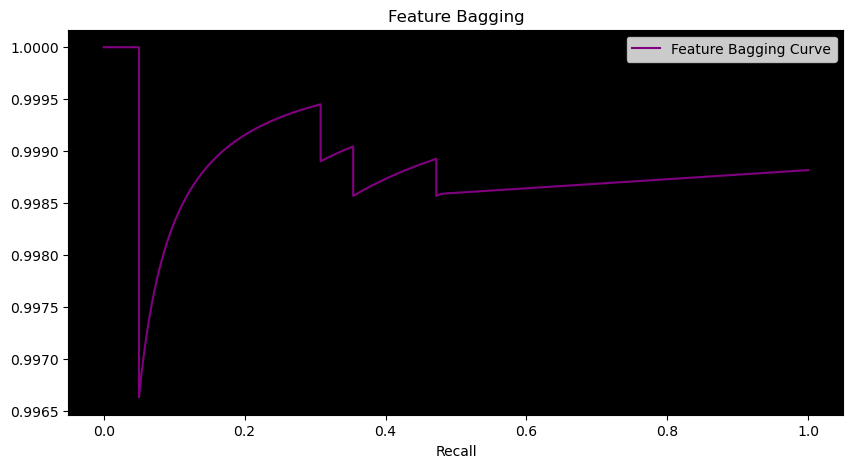

In [505]:
# Implement Task 6b 
import sklearn.metrics as met

test_precision = met.precision_score(test_labels, np.round(anomaly_scores4[:,0]), pos_label = 0)
test_recall = met.recall_score(test_labels, np.round(anomaly_scores4[:,0]), pos_label = 0)
test_curve_FB = met.precision_recall_curve(test_labels, anomaly_scores4[:,0], pos_label = 0)

plt.figure(figsize=(10, 5))
plt.plot(test_curve_FB[1], test_curve_FB[0], color='purple', label='Feature Bagging Curve')
plt.title('Feature Bagging')
plt.xlabel('Recall')
plt.legend()
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test AUC:', met.auc(test_curve_FB[1], test_curve_FB[0]))
plt.gca().set_facecolor('black')
plt.show()

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 7

### Compare the scores from the implemented methods. Which one performed better. Why do you think this is the case?


</div>

### Please write your answer here

A: So, by looking at the characteristics of these diverse methods. the better AUC the function has, the better. Therefore, by simply looking at the AUC (area under the curve), the PCA Method wins, since it has the highest. However, it is not by far. In addition, in order for the curve to be as ideal as possible it should be as close to the upper right corner as possible, namely the yellow dot at position (x, y) = (1, 1), as seen in the plot. And as we can see in the plot below, the PCA curve(blue) wins on this metric as well compared to the others.

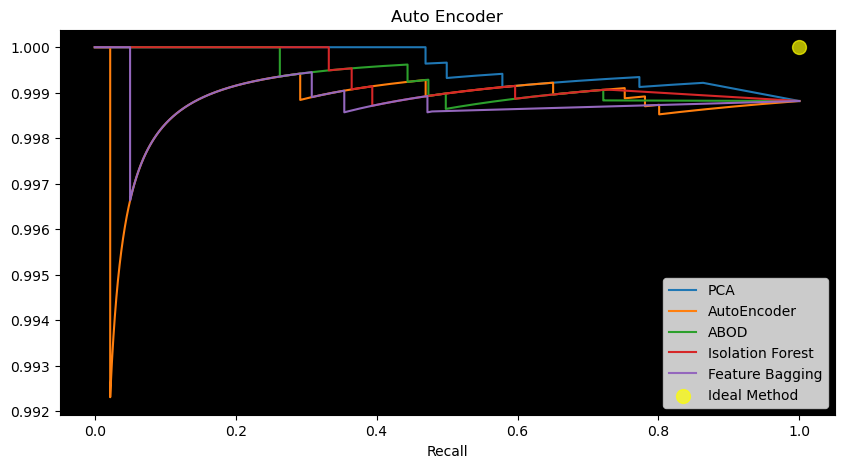

In [506]:
plt.figure(figsize=(10, 5))

plt.plot(test_curve_PCA[1], test_curve_PCA[0], label='PCA')
plt.plot(test_curve_AutoEncoder[1], test_curve_AutoEncoder[0], label='AutoEncoder')
plt.plot(test_curve_ABOD[1], test_curve_ABOD[0], label='ABOD')
plt.plot(test_curve_IsoForest[1], test_curve_IsoForest[0], label='Isolation Forest')
plt.plot(test_curve_FB[1], test_curve_FB[0], label='Feature Bagging')

plt.scatter(1, 1, c='yellow', s=100, label='Ideal Method', alpha=0.7)

plt.title('Auto Encoder')
plt.xlabel('Recall')
plt.legend()

# Set the background color to black
plt.gca().set_facecolor('black')

plt.show()